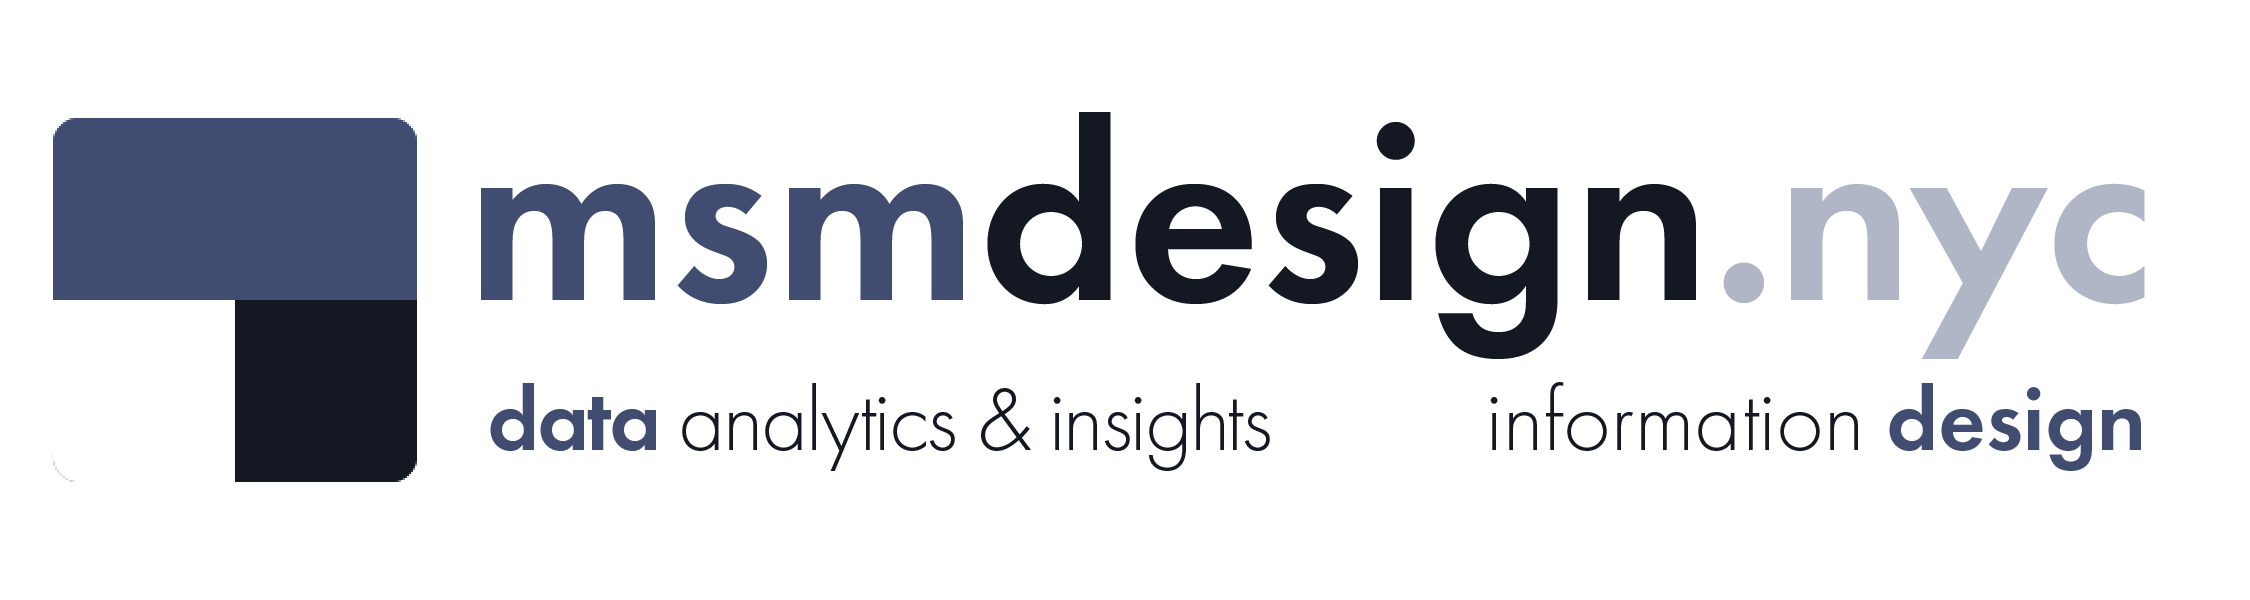

# Exploratory Data Analysis

**Catalogue Number:** MSM-032

**Description:** Exploring the MIT Election Lab Database: State Constituency-Level Returns 2018 (Part 1)

**Author:** David White

**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

**Acknowledgements:** Massachusetts Institute of Technology Election Data + Science Lab https://electionlab.mit.edu/

**Language:** Python

**Libraries Used:** NumPy, pandas, matplotlib, seaborn 

**Publication Date:** Monday, August 9, 2021

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.


## 0. About this Dataset

**Data Source: Massachusetts Institute of Technology Election Data + Science Lab https://electionlab.mit.edu/** 

MIT Election Data and Science Lab. 
State Constituency-Level Returns 2018.
This repository contains official constituency (state-level) for the 2018 midterm elections, including data for the U.S. House, U.S. Senate, state offices and county-level returns.

## 1. Prepare the Workspace

In [ ]:
# import libraries need for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset from GitHub repository and glimpse

df = pd.read_csv('https://raw.githubusercontent.com/MEDSL/2018-elections-official/master/district_overall_2018.csv', encoding = 'utf-8')
df.head(5)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,2018,California,CA,6,93,71,U.S. Representative,District 1,gen,False,Audrey Denney,democrat,False,total,263096,583188,False,20190131
1,2018,California,CA,6,93,71,U.S. Representative,District 1,gen,False,Doug La Malfa,republican,False,total,320092,583188,False,20190131
2,2018,California,CA,6,93,71,U.S. Representative,District 10,gen,False,Jeff Denham,republican,False,total,211910,443800,False,20190131
3,2018,California,CA,6,93,71,U.S. Representative,District 10,gen,False,Josh Harder,democrat,False,total,231890,443800,False,20190131
4,2018,California,CA,6,93,71,U.S. Representative,District 11,gen,False,John Fitzgerald,republican,False,total,142624,551362,False,20190131


## 2. Describe the Characteristics of the Dataset

In [ ]:
# determine the number of rows and columns in the dataset

df.shape

(1411, 18)

In [ ]:
# list each of the columns contained in the dataset 

df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'special', 'candidate', 'party',
       'writein', 'mode', 'candidatevotes', 'totalvotes', 'unofficial',
       'version'],
      dtype='object')

In [ ]:
# list the datatype of each variable contained in the dataset and check to see which variables have missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            1411 non-null   int64 
 1   state           1411 non-null   object
 2   state_po        1411 non-null   object
 3   state_fips      1411 non-null   int64 
 4   state_cen       1411 non-null   int64 
 5   state_ic        1411 non-null   int64 
 6   office          1411 non-null   object
 7   district        1411 non-null   object
 8   stage           1411 non-null   object
 9   special         1411 non-null   bool  
 10  candidate       1256 non-null   object
 11  party           1250 non-null   object
 12  writein         1411 non-null   bool  
 13  mode            1411 non-null   object
 14  candidatevotes  1411 non-null   int64 
 15  totalvotes      1411 non-null   int64 
 16  unofficial      1411 non-null   bool  
 17  version         1411 non-null   int64 
dtypes: bool(

## 3. Summarize the Dataset

In [ ]:
# how many (unique) years are represented in this dataset?

print(df['year'].unique())

[2018]


In [ ]:
# which states are represented in this dataset?

print(df['state'].unique())

['California' 'Georgia' 'Florida' 'Illinois' 'Kansas' 'Maryland'
 'Michigan' 'New York' 'Pennsylvania' 'South Carolina' 'Tennessee' 'Texas'
 'Virginia' 'Washington' 'Arizona' 'Alabama' 'Alaska' 'Arkansas'
 'Colorado' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa' 'Kentucky'
 'Louisiana' 'Maine' 'Massachusetts' 'Mississippi' 'Minnesota' 'Missouri'
 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Rhode Island' 'South Dakota'
 'Utah' 'Vermont' 'Connecticut' 'West Virginia' 'Wisconsin' 'Wyoming'
 'North Carolina']


In [ ]:
# how many unique values are replesented in each column?

counts = df.nunique()
counts

year                 1
state               50
state_po            50
state_fips          50
state_cen           50
state_ic            50
office               1
district            54
stage                1
special              1
candidate         1113
party               46
writein              2
mode                 1
candidatevotes    1314
totalvotes         428
unofficial           2
version              1
dtype: int64

In [ ]:
# print summary statistics on the dataset

df.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version
count,1411.0,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.0
mean,2018.0,28.742027,52.439405,38.263643,93611.061658,306498.878101,20190131.0
std,0.0,15.187623,25.191741,20.688571,87423.266141,124064.761256,0.0
min,2018.0,1.000000,11.000000,1.000000,0.000000,117494.000000,20190131.0
25%,2018.0,13.000000,31.000000,21.000000,4616.500000,238007.500000,20190131.0
50%,2018.0,31.000000,56.000000,43.000000,95486.000000,275406.000000,20190131.0
75%,2018.0,40.000000,74.000000,51.500000,153832.500000,323928.000000,20190131.0
max,2018.0,56.000000,95.000000,82.000000,550584.000000,762498.000000,20190131.0


In [ ]:
# find the total number of votes by party and state

state_votes = df.groupby(['state','party'])['totalvotes'].sum()
pd.set_option('max_rows', 99999)

print(state_votes)

state           party                          
Alabama         democrat                            1399222
                republican                          1210059
Alaska          democrat                             282166
                republican                           282166
Arizona         democrat                            2341270
                green                                409086
                republican                          2209219
Arkansas        democrat                             889298
                libertarian                          889298
                republican                           889298
California      democrat                           25123268
                green                               1136384
                no party preference                  973478
                republican                         21504958
Colorado        democrat                            2513546
                independent                         

In [ ]:
# find the total number of votes by party and district

district_votes = df.groupby(['state','district','party'])['totalvotes'].sum()
pd.set_option('max_rows', 99999)

print(district_votes)

state           district     party                          
Alabama         District 1   democrat                            242617
                             republican                          242617
                District 2   democrat                            226230
                             republican                          226230
                District 3   democrat                            231915
                             republican                          231915
                District 4   democrat                            230969
                             republican                          230969
                District 6   democrat                            278328
                             republican                          278328
                District 7   democrat                            189163
Alaska          District 0   democrat                            282166
                             republican                          282166
Ari

In [ ]:
# find the total number of votes by party and candidate

candidate_votes = df.groupby(['state','office','district','party','candidate'])['totalvotes'].sum()
pd.set_option('max_rows', 99999)

print(candidate_votes)

state           office               district     party                            candidate                    
Alabama         U.S. Representative  District 1   democrat                         Robert Kennedy Jr.                242617
                                                  republican                       Bradley Byrne                     242617
                                     District 2   democrat                         Tabitha Isner                     226230
                                                  republican                       Martha Roby                       226230
                                     District 3   democrat                         Mallory Hagan                     231915
                                                  republican                       Mike Rogers                       231915
                                     District 4   democrat                         Lee Auman                         230969
                   

## 4. Visualize the Dataset

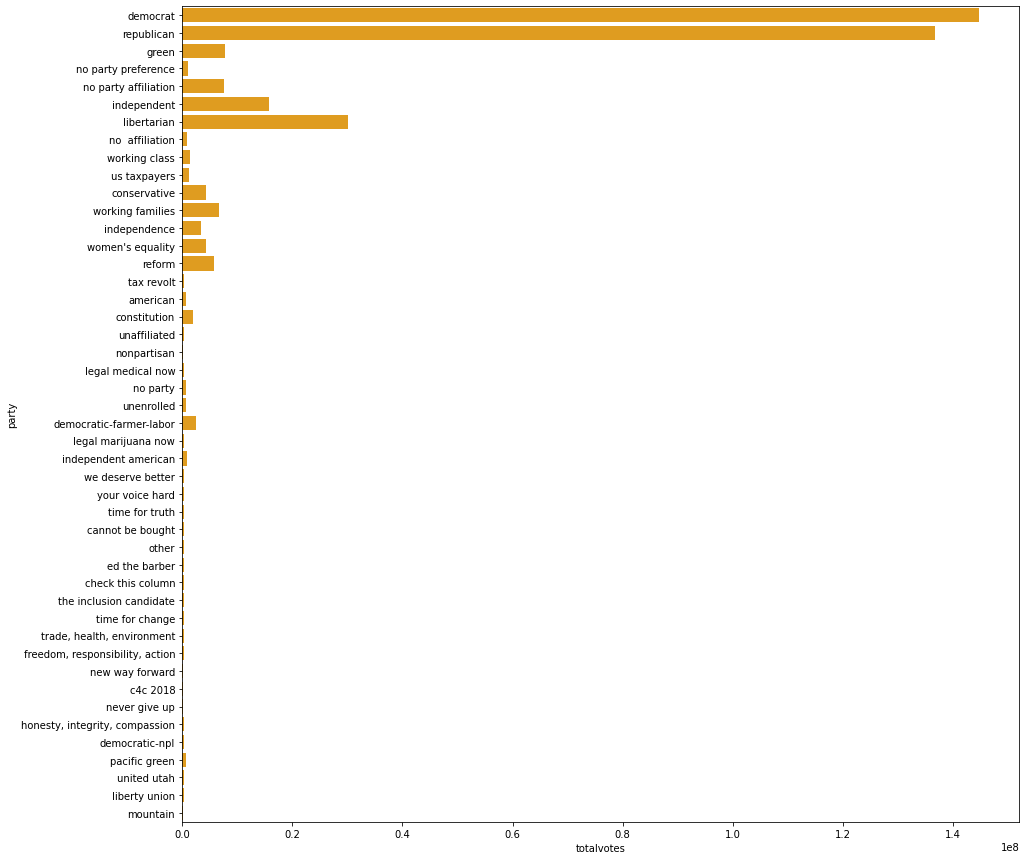

In [ ]:
# total votes by party affiliation

plt.figure(figsize=(15, 15))
sns.barplot(x='totalvotes',y='party',data=df, color='orange',ci=None,estimator=sum)